All of this code comes from Analytics Vidhya, "Feature Engineering for Images: A Valuable Introduction to the HOG Feature Descriptor" by Aishwarya Singh

https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/

We load the required libraries and the image

(670, 391, 3)


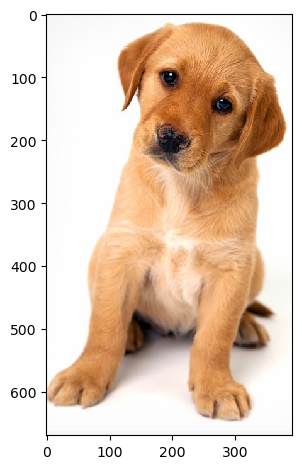

In [2]:
#importing required libraries
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline


#reading the image
img = imread('puppy.jpeg')
imshow(img)
print(img.shape)

We need to resize this image into 64x128.

(128, 64, 3)


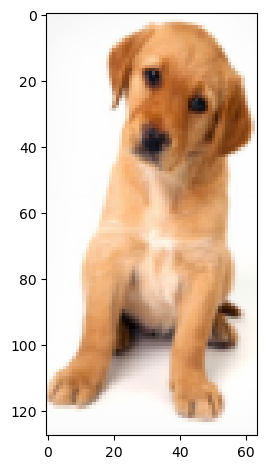

In [2]:
#resizing image 
resized_img = resize(img, (128,64)) 
imshow(resized_img) 
print(resized_img.shape)

USING the HOG function to return the feature matrix. Also, the visualize=True will return an image of the HOG

In [3]:
#creating hog features 
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

/var/folders/2s/11ldfx_j2c9237b89l98fmdr0000gn/T/ipykernel_25128/4039989560.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),


Hmm that didn't seem to work in terms of visualizing anything...

Orientations are the number of buckets (9x1 matrix)

pixels_per_cell is the 8x8 cells 

cells_per_block is not the number of pixels (16x16) 

In [4]:
fd.shape

(3780,)

Let's look at the image!

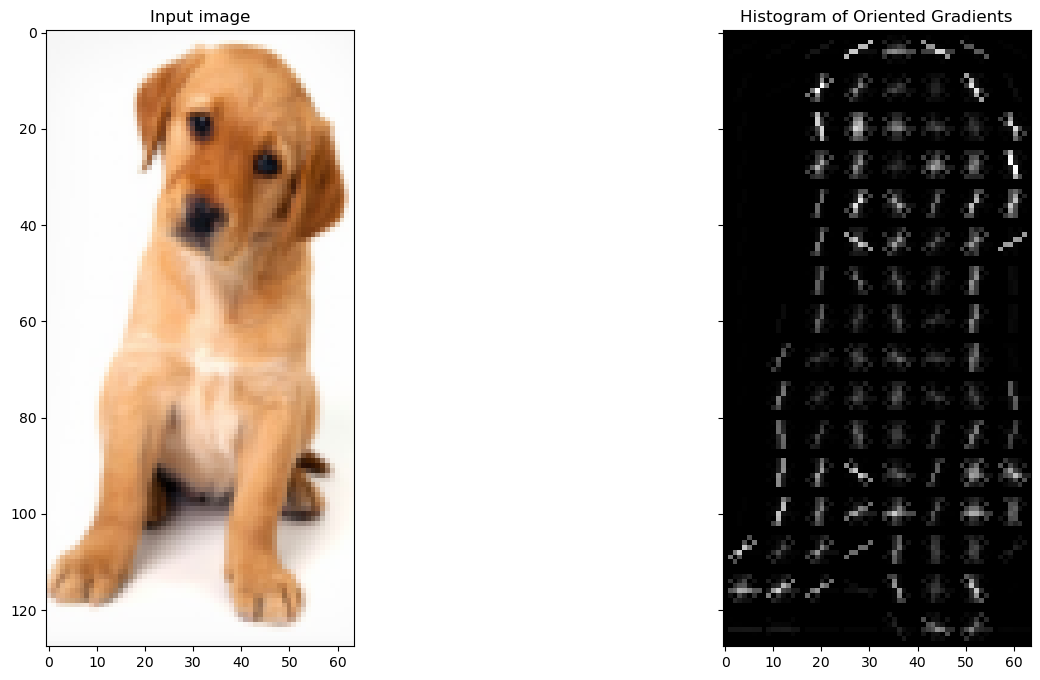

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

Now let's try this with my own photo!


(996, 1065, 3)


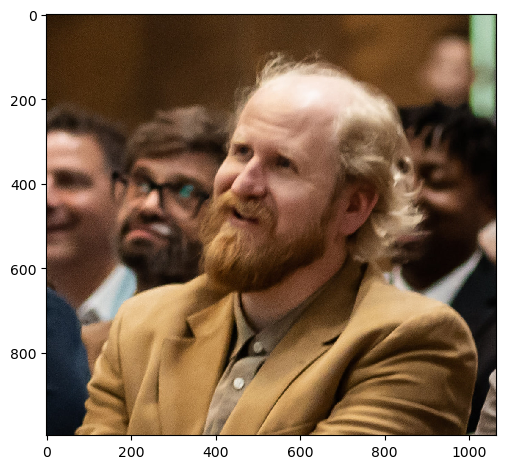

In [10]:
#reading the image
img = imread('me.jpeg')
imshow(img)
print(img.shape)

(128, 64, 3)


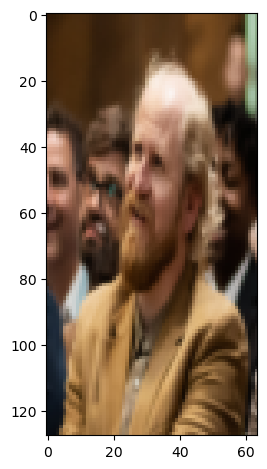

In [11]:
resized_img = resize(img, (128,64)) 
imshow(resized_img) 
print(resized_img.shape)

In [12]:
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
fd.shape

/var/folders/2s/11ldfx_j2c9237b89l98fmdr0000gn/T/ipykernel_26205/1873870094.py:1: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),


(3780,)

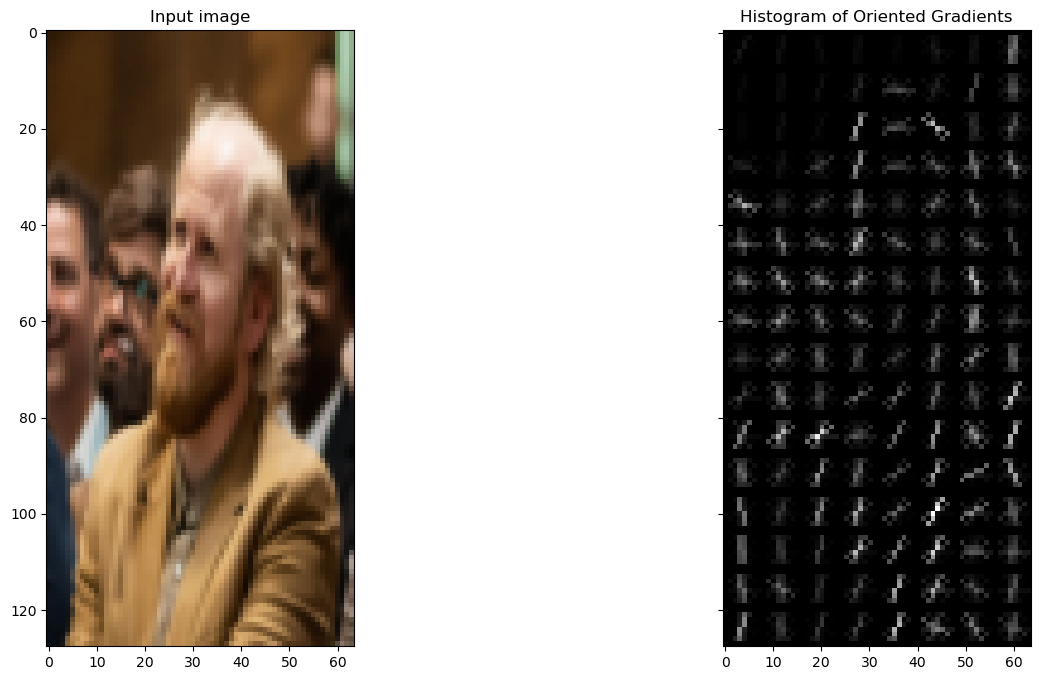

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

This is not very good! I wonder if I mess around with the pixels per cell! 

In [14]:
fd, hog_image = hog(resized_img, orientations=36, pixels_per_cell=(16, 16), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)


/var/folders/2s/11ldfx_j2c9237b89l98fmdr0000gn/T/ipykernel_26205/4171294206.py:1: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, orientations=36, pixels_per_cell=(16, 16),


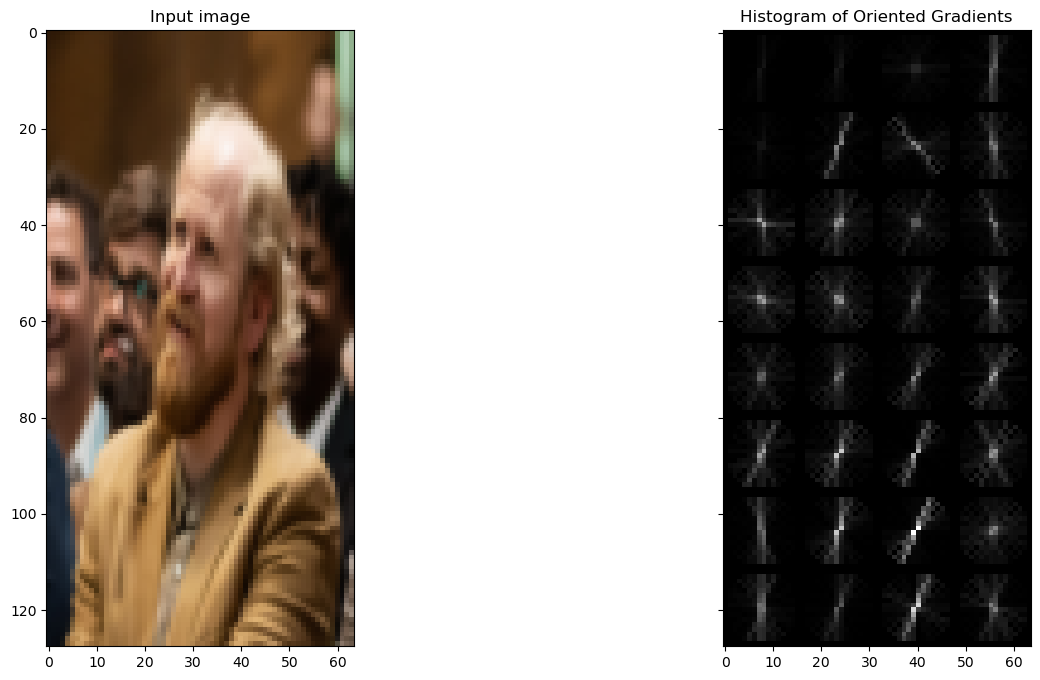

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

Whoa! Not good! Need to go back down! 

/var/folders/2s/11ldfx_j2c9237b89l98fmdr0000gn/T/ipykernel_26205/3282595958.py:1: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, orientations=4, pixels_per_cell=(4, 4),


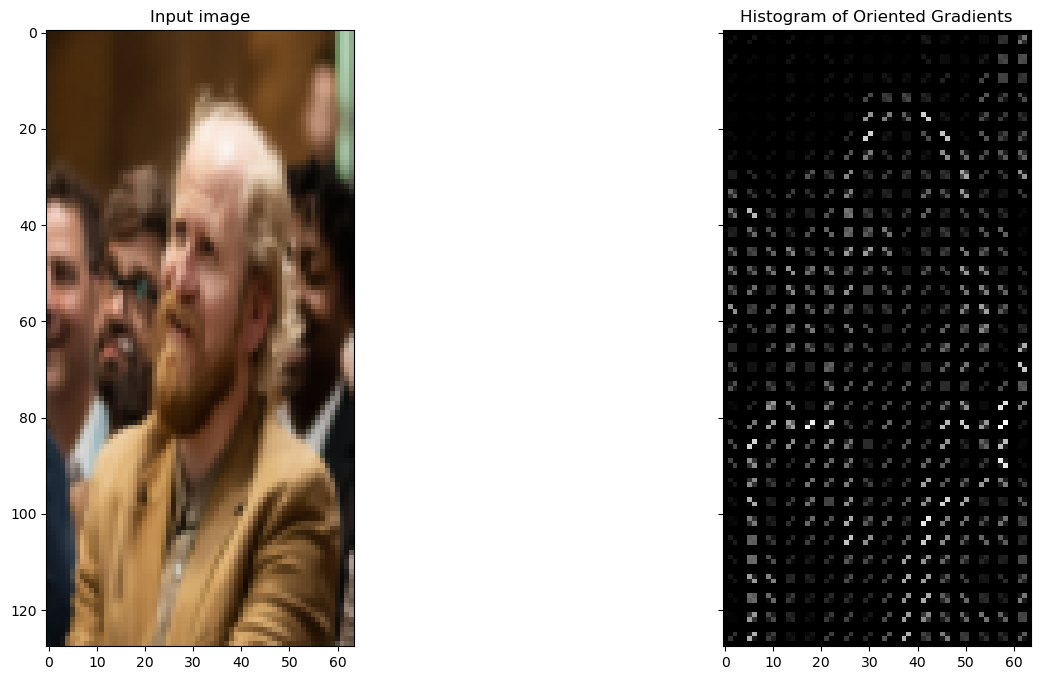

In [22]:
fd, hog_image = hog(resized_img, orientations=4, pixels_per_cell=(4, 4), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

Better but will have to mess around with it more to get more distincting between foregorund and background.